In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris=load_iris()
x=iris.data
y=iris.target

In [ ]:
df=pd.DataFrame(x,columns=iris.feature_names)
df['target']=y

print("\nFirst 5 rows of the dataset:\n",df.head())
print("\nLast 5 rows of the dataset:\n",df.tail())


First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Last 5 rows of the dataset:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4         

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

x_train=torch.tensor(x_train,dtype=torch.float32)
x_test=torch.tensor(x_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.long)
y_test=torch.tensor(y_test,dtype=torch.long)

train_dataset=TensorDataset(x_train, y_train)
test_dataset=TensorDataset(x_test, y_test)
train_loader=DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=16)


class IrisClassifier(nn.Module):
  def __init__(self,input_size):
    super(IrisClassifier,self).__init__()
    self.fc1=nn.Linear(input_size, 16)
    self.fc2=nn.Linear(16, 8)
    self.fc3=nn.Linear(8, 3)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    return self.fc3(x)

def train_model(model, train_loader, criterion, optimizer, epochs):
  for epoch in range(epochs):
    model.train()
    for x_batch, y_batch in train_loader:
      optimizer.zero_grad()
      outputs=model(x_batch)
      loss=criterion(outputs, y_batch)
      loss.backward()
      optimizer.step()
    if (epoch + 1) % 10 == 0:
      print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

model = IrisClassifier(input_size=x_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer, epochs=100)

model.eval()
predictions, actuals = [], []
with torch.no_grad():
  for x_batch, y_batch in test_loader:
    outputs = model(x_batch)
    _, predicted = torch.max(outputs, 1)
    predictions.extend(predicted.numpy())
    actuals.extend(y_batch.numpy())

accuracy=accuracy_score(actuals, predictions)
confusion_matrix=confusion_matrix(actuals, predictions)
classification_report=classification_report(actuals, predictions)


print("Name: SHYAM S")
print("Register Number: 212223240156")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)

Epoch [10/100], Loss: 0.8025
Epoch [20/100], Loss: 0.4782
Epoch [30/100], Loss: 0.3743
Epoch [40/100], Loss: 0.2116
Epoch [50/100], Loss: 0.2699
Epoch [60/100], Loss: 0.2413
Epoch [70/100], Loss: 0.0539
Epoch [80/100], Loss: 0.1023
Epoch [90/100], Loss: 0.0646
Epoch [100/100], Loss: 0.0499
Name: SHYAM S
Register Number: 212223240156
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



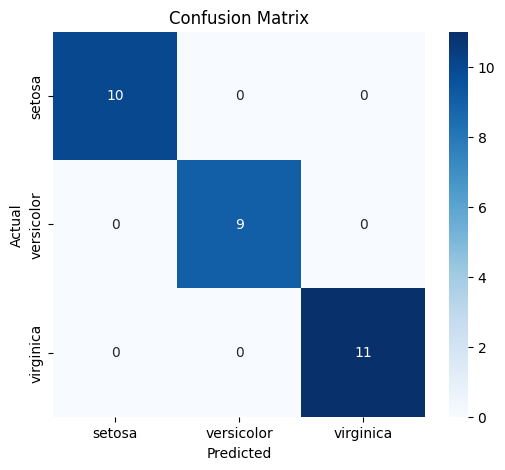


Name: SHYAM S
Register Name: 212223240156
Predicted class for sample input: setosa
Actual class for sample input: setosa


In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True,cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

sample_input = x_test[5].unsqueeze(0)
with torch.no_grad():
  output = model(sample_input)
  predicted_class_index = torch.argmax(output[0]).item()
  predicted_class_label = iris.target_names[predicted_class_index]

print("\nName: SHYAM S")
print("Register Name: 212223240156")
print(f"Predicted class for sample input: {predicted_class_label}")
print(f"Actual class for sample input: {iris.target_names[y_test[5].item()]}")